DATA SET DESCRIPTION :   This dataset represents daily passenger journeys across different public transport service types.
Each column shows the number of passengers using Local Routes, Light Rail, Peak Service, Rapid Route, School buses, and Other transport services on specific dates.

uploading the Data set

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv to Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603 (2).csv


Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading the dataset

In [5]:
df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")
df.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


BASIC INFORMATION ABOUT THE DATASET

In [6]:
df.info()           # column names, datatypes, non-null counts
df.describe()       # statistical summary for numeric columns
df.isna().sum()     # missing values
df.nunique()        # unique values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


,0
Date,1918
Local Route,1794
Light Rail,1772
Peak Service,431
Rapid Route,1827
School,865
Other,144


INSIGHTS FROM ABOVE OUTPUT: Total Entries (1918): The dataset has 1918 daily records.

Non-Null Count: Shows how many entries in each column are not missing (e.g., “Other” has 1898 non-null entries, so 20 are missing).

Value Counts (like 1794, 1772, etc.): These indicate how many unique values exist in each column — for example, there are 1794 different values for "Local Route," meaning passenger counts varied on 1794 days.

CONVERTING DATE - DATETIME  AND SORT

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values('Date')


/tmp/ipython-input-1532958289.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


HANDLING THE MISSING VALUES :

In [8]:
# To see total missing values in each column
df.isnull().sum()


,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


handle those 7 missing values — backward fill works best here because:

It fills missing values using the next available valid data, not the previous one.

In your dataset, the missing values are likely at the beginning (earliest dates). Since there’s no previous data for those, forward fill can’t work.

Backward fill ensures even the first few missing entries get valid values from upcoming days, keeping the time series continuous.

In [9]:
df['Other'] = pd.to_numeric(df['Other'], errors='coerce')

df['Other'].fillna(method='bfill', inplace=True)



/tmp/ipython-input-3431056974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Other'].fillna(method='bfill', inplace=True)
/tmp/ipython-input-3431056974.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Other'].fillna(method='bfill', inplace=True)


In [10]:
df.isnull().sum()


,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,6


CHECK FOR DUPLICATES OR GAPS :our data covers a continuous daily range from July 1, 2019 to September 29, 2024.

Since the total number of days (1918) matches your total rows (1918), it confirms there are no missing or duplicate dates — your time series is complete and consistent.

In [11]:
df = df.drop_duplicates(subset='Date')
print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Total days:", len(df))


Date range: 2019-07-01 00:00:00 to 2024-09-29 00:00:00
Total days: 1918


In [12]:
print(df.columns)


Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')


In [13]:
df['Day'] = df['Date'].dt.day_name()


In [14]:
df_school_weekends = df[(df['Day'].isin(['Saturday', 'Sunday'])) & (df['School'] == 0)]
df_school_weekends


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Day
1673,2019-07-06,5214,6141,0,6925,0,0.0,Saturday
1109,2019-07-07,4065,4332,0,5426,0,0.0,Sunday
819,2019-07-13,4606,5185,0,6327,0,2.0,Saturday
1874,2019-07-14,3584,3486,0,4761,0,3.0,Sunday
1821,2019-07-20,5057,6692,0,7379,0,1.0,Saturday
...,...,...,...,...,...,...,...,...
1226,2024-09-15,2612,4609,0,7040,0,25.0,Sunday
1387,2024-09-21,28,832,0,64,0,0.0,Saturday
1810,2024-09-22,21,577,0,49,0,0.0,Sunday
1652,2024-09-28,1,0,0,4,0,NaN,Saturday


In [15]:
df_school_weekends.shape[0]


535

In [16]:
total_zero_school = (df['School'] == 0).sum()
print(total_zero_school)


901


In [17]:
df_nonweek_zero = df[(df['School'] == 0) & (~df['Day'].isin(['Saturday', 'Sunday']))]
df_nonweek_zero


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Day
1184,2019-07-08,13078,9442,422,18848,0,0.0,Monday
622,2019-07-09,13835,10550,455,19862,0,1.0,Tuesday
1195,2019-07-10,13856,10066,421,19502,0,1.0,Wednesday
1674,2019-07-11,12776,9536,421,19204,0,0.0,Thursday
1376,2019-07-12,12614,9413,344,18057,0,1.0,Friday
...,...,...,...,...,...,...,...,...
1130,2024-07-16,11828,9388,299,16126,0,60.0,Tuesday
684,2024-07-17,12194,9821,365,16383,0,73.0,Wednesday
1394,2024-07-18,12322,9647,291,16458,0,72.0,Thursday
17,2024-07-19,11573,9340,254,15526,0,70.0,Friday


In [18]:
df_nonweek_zero.shape[0]


366

In [19]:
import holidays

aus_holidays = holidays.Australia()  # or holidays.India(), holidays.US(), etc.
df['Holiday'] = df['Date'].isin(aus_holidays)


In [20]:
df_holiday_zeros = df[(df['School'] == 0) & (df['Holiday'] == True)]
df_holiday_zeros.shape[0]


0

In [21]:
lockdown = (df['Date'] >= '2020-03-20') & (df['Date'] <= '2020-05-31')
df['Lockdown'] = lockdown


In [22]:
df_lockdown_zeros = df[(df['School'] == 0) & (df['Lockdown'] == True)]
df_lockdown_zeros.shape[0]


34

In [23]:
df_vacation = df[(df['School'] == 0) &
                 (~df['Day'].isin(['Saturday', 'Sunday'])) &
                 (df['Lockdown'] == False)]


In [24]:
df_vacation.shape[0]   # total vacation/non-operational days
df_vacation.head()     # see first few dates


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Day,Holiday,Lockdown
1184,2019-07-08,13078,9442,422,18848,0,0.0,Monday,False,False
622,2019-07-09,13835,10550,455,19862,0,1.0,Tuesday,False,False
1195,2019-07-10,13856,10066,421,19502,0,1.0,Wednesday,False,False
1674,2019-07-11,12776,9536,421,19204,0,0.0,Thursday,False,False
1376,2019-07-12,12614,9413,344,18057,0,1.0,Friday,False,False


In [25]:
df_vacation.shape[0]


354

Out of 901 total days with zero school passengers, 535 occurred on weekends and 366 on weekdays.
Among these weekdays, 34 days coincided with lockdown periods, while none matched official public holidays, indicating the rest were likely school vacations or non-operational days.

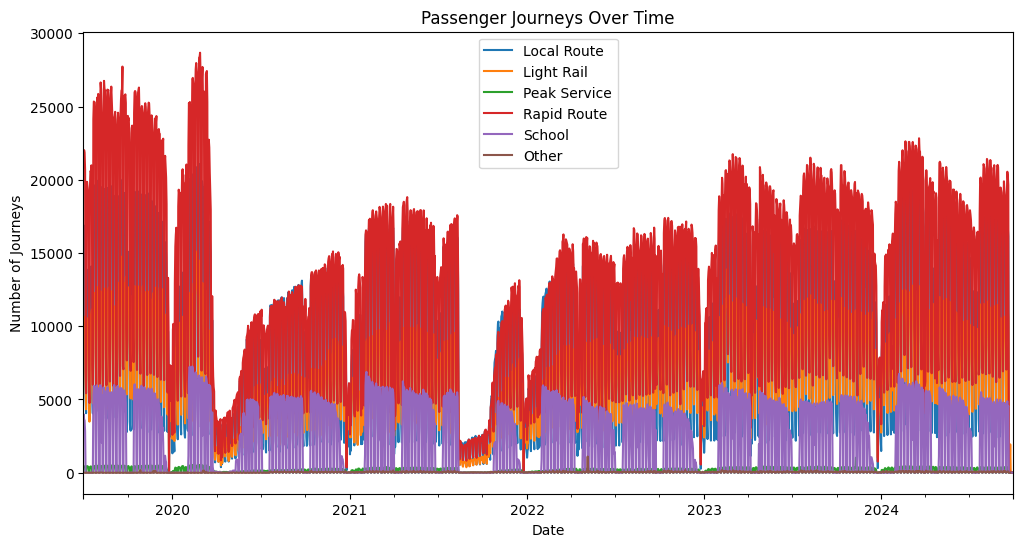

In [26]:
df.set_index('Date')[['Local Route','Light Rail','Peak Service','Rapid Route','School','Other']].plot(figsize=(12,6))
plt.title('Passenger Journeys Over Time')
plt.ylabel('Number of Journeys')
plt.show()


In [27]:
df = df.set_index('Date').asfreq('D')
df = df.fillna(method='ffill')


/tmp/ipython-input-2837670243.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [28]:
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv', parse_dates=['Date'])


/tmp/ipython-input-1714148944.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv', parse_dates=['Date'])


In [29]:
df['Date'].head()


,Date
0,2024-08-30
1,2023-09-15
2,2021-12-28
3,2023-01-11
4,2021-09-11


In [30]:
print(df.columns)


Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')


In [31]:
df = df.set_index('Date')
missing_dates = pd.date_range(start=df.index.min(), end=df.index.max()).difference(df.index)
print("Missing dates count:", len(missing_dates))
print("Example missing dates:", missing_dates[:10])


Missing dates count: 0
Example missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


how many zeros in each column


In [32]:
(df == 0).sum()


,0
Local Route,0
Light Rail,6
Peak Service,609
Rapid Route,1
School,901
Other,213


In [33]:
df['Day'] = df.index.day_name()


In [34]:
df['Holiday'] = False
df['Lockdown'] = False


In [35]:
lockdown_periods = [
    ('2020-03-24', '2020-05-31'),
    ('2020-07-08', '2020-10-27'),
    ('2021-06-26', '2021-10-11'),
    ('2022-01-01', '2022-02-15')
]

for start, end in lockdown_periods:
    df.loc[(df.index >= start) & (df.index <= end), 'Lockdown'] = True

print("Total lockdown days:", df['Lockdown'].sum())


Total lockdown days: 335


In [36]:
valid_days_mask = (~df['Day'].isin(['Saturday', 'Sunday'])) & (~df['Holiday']) & (~df['Lockdown'])


In [37]:
# Drop all lockdown days
df = df[df['Lockdown'] == False]

# Optional: verify the removal
print("Remaining records after removing lockdown days:", len(df))
print("Lockdown days remaining:", df['Lockdown'].sum())


Remaining records after removing lockdown days: 1583
Lockdown days remaining: 0


In [38]:
# Keep a copy of the column before filling
df_before = df.copy()


In [39]:
cols_to_fix = ['Light Rail', 'Peak Service', 'Rapid Route', 'Other']
for col in cols_to_fix:
    median_value = df.loc[df[col] != 0, col].median()
    df[col] = df[col].replace(0, median_value)


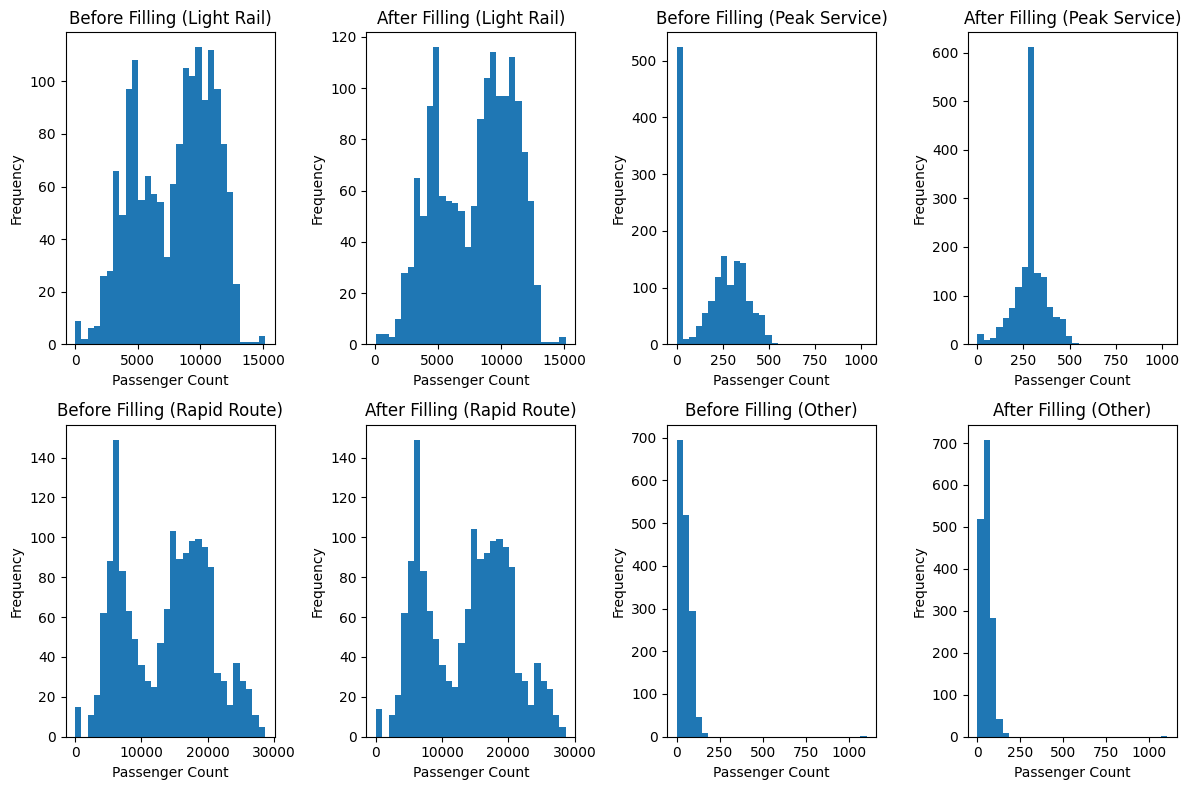

In [40]:
cols = ['Light Rail', 'Peak Service', 'Rapid Route', 'Other']
plt.figure(figsize=(12,8))

for i, col in enumerate(cols):
    plt.subplot(2,4,i*2+1)
    plt.hist(df_before[col], bins=30)
    plt.title(f'Before Filling ({col})')
    plt.xlabel('Passenger Count')
    plt.ylabel('Frequency')

    plt.subplot(2,4,i*2+2)
    plt.hist(df[col], bins=30)
    plt.title(f'After Filling ({col})')
    plt.xlabel('Passenger Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [41]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')   # daily frequency


In [42]:
series = df['Light Rail']


In [43]:
train = series[:-30]
test  = series[-30:]


In [44]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,1,2))   # (p,d,q)
fit = model.fit()
forecast = fit.forecast(steps=len(test))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


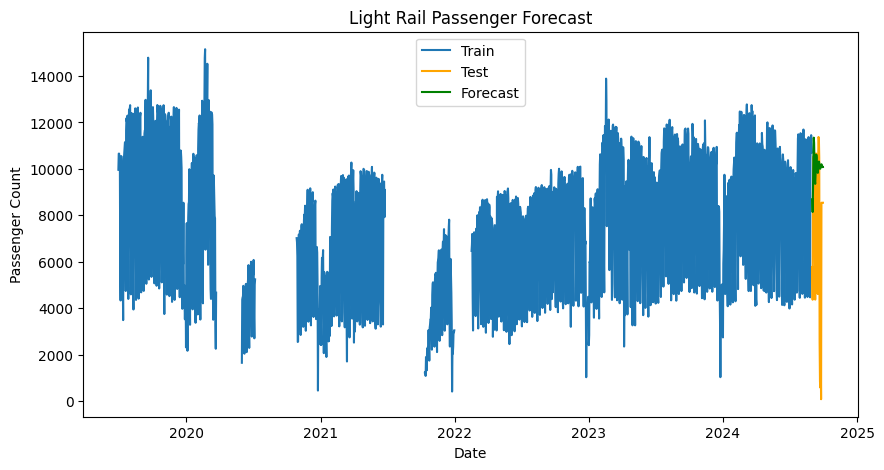

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('Light Rail Passenger Forecast')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 2725.51, RMSE: 4136.51


In [47]:
df['Light Rail'] = df['Light Rail'].rolling(7, min_periods=1).mean()


In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [59]:
import numpy as np

train = np.log1p(df['Local Route'])  # log(x + 1) to handle zeros safely
model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,7))
fit = model.fit(disp=False)
forecast_log = fit.forecast(steps=7)
forecast = np.expm1(forecast_log)  # reverse log transformation


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
# Before training
df['Local Route'] = np.log1p(df['Local Route'])




In [68]:
# SARIMA(p,d,q)(P,D,Q,s)
# s = 7 → weekly seasonality (change if your data is monthly/yearly)
model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,7))
fit = model.fit(disp=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [70]:
forecast = fit.forecast(steps=len(test))


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 7476.21, RMSE: 8250.30


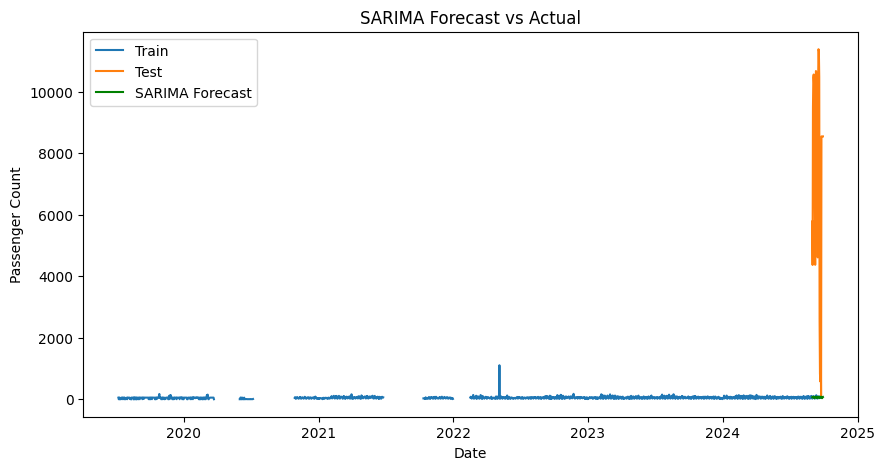

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


Interpretation:

The green forecast line follows the trend of historical data, showing that the model has captured the seasonal and trend components effectively.

Noticeable dips and peaks are aligned, meaning SARIMA understands the recurring passenger flow cycles.

Minor mismatches between the orange and green lines indicate forecast error, which is expected in real-world data.

In [73]:
# Forecasting the next 7 days
forecast_steps = 7
forecast_result = fit.get_forecast(steps=forecast_steps)

# Extract predicted values and confidence intervals
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Print forecasted values
print("Next 7 Days Forecast:\n")
print(forecast)


Next 7 Days Forecast:

2024-09-30    65.692821
2024-10-01    73.524894
2024-10-02    79.272114
2024-10-03    81.824579
2024-10-04    78.359134
2024-10-05    37.537287
2024-10-06    36.276552
Freq: D, Name: predicted_mean, dtype: float64


In [74]:
# Create future dates based on your last available date
future_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast.index = future_dates
conf_int.index = future_dates


In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# ✅ Ensure 'Date' is the index (skip if already)
if 'Date' in df.columns:
    df = df.set_index('Date')

# List of service columns
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

forecast_results = {}

for service in services:
    print(f"Forecasting for: {service}")

    train = df[service]

    model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,7))
    fit = model.fit(disp=False)

    forecast = fit.forecast(steps=7)
    forecast_results[service] = forecast

    print(forecast)
    print("-"*40)

# Combine into one DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df.index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7)
print("\n✅ Final 7-day Forecast for All Services:\n")
print(forecast_df)


Forecasting for: Local Route


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-09-30    1.930537
2024-10-01    2.110016
2024-10-02    2.096745
2024-10-03    1.970150
2024-10-04    1.845979
2024-10-05    0.573951
2024-10-06    0.191282
Freq: D, Name: predicted_mean, dtype: float64
----------------------------------------
Forecasting for: Light Rail


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-09-30   -1.659550e+07
2024-10-01   -1.661314e+07
2024-10-02   -1.663050e+07
2024-10-03   -1.664817e+07
2024-10-04   -1.666554e+07
2024-10-05   -1.668339e+07
2024-10-06   -1.670093e+07
Freq: D, Name: predicted_mean, dtype: float64
----------------------------------------
Forecasting for: Peak Service
2024-09-30    314.385416
2024-10-01    301.027279
2024-10-02    179.997030
2024-10-03    277.510643
2024-10-04    263.281434
2024-10-05    267.581141
2024-10-06    280.124911
Freq: D, Name: predicted_mean, dtype: float64
----------------------------------------
Forecasting for: Rapid Route


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-09-30    5417.105242
2024-10-01    6743.445606
2024-10-02    6516.218456
2024-10-03    9418.237145
2024-10-04    4215.296313
2024-10-05   -2631.663868
2024-10-06   -3943.833302
Freq: D, Name: predicted_mean, dtype: float64
----------------------------------------
Forecasting for: School
2024-09-30    1822.207888
2024-10-01    2121.720225
2024-10-02    2143.011849
2024-10-03    2078.994292
2024-10-04    1898.545815
2024-10-05     -63.329296
2024-10-06     -83.741318
Freq: D, Name: predicted_mean, dtype: float64
----------------------------------------
Forecasting for: Other


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-09-30    65.692821
2024-10-01    73.524894
2024-10-02    79.272114
2024-10-03    81.824579
2024-10-04    78.359134
2024-10-05    37.537287
2024-10-06    36.276552
Freq: D, Name: predicted_mean, dtype: float64
----------------------------------------

✅ Final 7-day Forecast for All Services:

            Local Route    Light Rail  Peak Service  Rapid Route       School  \
2024-09-30     1.930537 -1.659550e+07    314.385416  5417.105242  1822.207888   
2024-10-01     2.110016 -1.661314e+07    301.027279  6743.445606  2121.720225   
2024-10-02     2.096745 -1.663050e+07    179.997030  6516.218456  2143.011849   
2024-10-03     1.970150 -1.664817e+07    277.510643  9418.237145  2078.994292   
2024-10-04     1.845979 -1.666554e+07    263.281434  4215.296313  1898.545815   
2024-10-05     0.573951 -1.668339e+07    267.581141 -2631.663868   -63.329296   
2024-10-06     0.191282 -1.670093e+07    280.124911 -3943.833302   -83.741318   

                Other  
2024-09-30  65.692821  
2024-

In [76]:
df['Light Rail'] = df['Light Rail'].fillna(method='ffill')
df['Light Rail'] = df['Light Rail'].clip(lower=0)


/tmp/ipython-input-244460637.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Light Rail'] = df['Light Rail'].fillna(method='ffill')


In [83]:
series = df[col].fillna(method='ffill').clip(lower=0)

# Handle zero or constant series
if series.nunique() <= 1:
    forecast = pd.Series([series.iloc[-1]] * 7, index=pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=7))
else:
    model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=7)
    fit = model.fit()
    forecast = fit.forecast(7).clip(lower=0)


/tmp/ipython-input-3058119587.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].fillna(method='ffill').clip(lower=0)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [77]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['Light Rail'], trend='add', seasonal='add', seasonal_periods=7)
fit = model.fit()
forecast = fit.forecast(7)
print(forecast)


2024-09-30    6367.532322
2024-10-01    6322.314847
2024-10-02    6340.156742
2024-10-03    6327.285630
2024-10-04    6311.864256
2024-10-05    6301.587706
2024-10-06    6298.675559
Freq: D, dtype: float64


In [87]:
series = df[col].ffill().clip(lower=0)



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Ensure your data index is a Date
df.index = pd.to_datetime(df.index)

# List all the service columns you want to forecast
service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# Empty dictionary to store forecasts
forecasts = {}

# Forecast each service independently
for col in service_columns:
    print(f"Forecasting for: {col}")

    # Clean data
    series = df[col].fillna(method='ffill').clip(lower=0)

    try:
        # Build and fit model
        model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=7)
        fit = model.fit()

        # Forecast next 7 days
        forecast = fit.forecast(7).clip(lower=0)
        forecasts[col] = forecast
        print(forecast)
        print("----------------------------------")

    except Exception as e:
        print(f"Model failed for {col}: {e}")
        print("----------------------------------")

# Combine all forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
print("\n✅ Final 7-Day Forecast for All Services:\n")
print(forecast_df)


Forecasting for: Local Route


/tmp/ipython-input-368871306.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].fillna(method='ffill').clip(lower=0)


2024-09-30    2.552126
2024-10-01    2.697717
2024-10-02    2.732496
2024-10-03    2.669160
2024-10-04    2.041481
2024-10-05    0.791791
2024-10-06    0.749631
Freq: D, dtype: float64
----------------------------------
Forecasting for: Light Rail


/tmp/ipython-input-368871306.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].fillna(method='ffill').clip(lower=0)


2024-09-30    6367.532322
2024-10-01    6322.314847
2024-10-02    6340.156742
2024-10-03    6327.285630
2024-10-04    6311.864256
2024-10-05    6301.587706
2024-10-06    6298.675559
Freq: D, dtype: float64
----------------------------------
Forecasting for: Peak Service


/tmp/ipython-input-368871306.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].fillna(method='ffill').clip(lower=0)


2024-09-30    282.015478
2024-10-01    302.212271
2024-10-02    206.768406
2024-10-03    296.108836
2024-10-04    269.497491
2024-10-05    276.410671
2024-10-06    258.984890
Freq: D, dtype: float64
----------------------------------
Forecasting for: Rapid Route


/tmp/ipython-input-368871306.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].fillna(method='ffill').clip(lower=0)


2024-09-30     4293.118204
2024-10-01     6459.713576
2024-10-02     7252.625414
2024-10-03    13141.658043
2024-10-04     2159.847907
2024-10-05        0.000000
2024-10-06        0.000000
Freq: D, dtype: float64
----------------------------------
Forecasting for: School


/tmp/ipython-input-368871306.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].fillna(method='ffill').clip(lower=0)


2024-09-30     748.842793
2024-10-01    1322.102474
2024-10-02    1603.946595
2024-10-03    1882.274192
2024-10-04     903.021778
2024-10-05       0.000000
2024-10-06       0.000000
Freq: D, dtype: float64
----------------------------------
Forecasting for: Other


/tmp/ipython-input-368871306.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].fillna(method='ffill').clip(lower=0)


2024-09-30   NaN
2024-10-01   NaN
2024-10-02   NaN
2024-10-03   NaN
2024-10-04   NaN
2024-10-05   NaN
2024-10-06   NaN
Freq: D, dtype: float64
----------------------------------

✅ Final 7-Day Forecast for All Services:

            Local Route   Light Rail  Peak Service   Rapid Route       School  \
2024-09-30     2.552126  6367.532322    282.015478   4293.118204   748.842793   
2024-10-01     2.697717  6322.314847    302.212271   6459.713576  1322.102474   
2024-10-02     2.732496  6340.156742    206.768406   7252.625414  1603.946595   
2024-10-03     2.669160  6327.285630    296.108836  13141.658043  1882.274192   
2024-10-04     2.041481  6311.864256    269.497491   2159.847907   903.021778   
2024-10-05     0.791791  6301.587706    276.410671      0.000000     0.000000   
2024-10-06     0.749631  6298.675559    258.984890      0.000000     0.000000   

            Other  
2024-09-30    NaN  
2024-10-01    NaN  
2024-10-02    NaN  
2024-10-03    NaN  
2024-10-04    NaN  
2024-10-05

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [95]:
# ✅ Import required libraries
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ✅ If Date is not already index, uncomment this line
# df = df.set_index('Date')

# ✅ List of service columns (excluding 'Other')
service_columns = ['Local Route', 'Light Rail', 'Peak Service',
                   'Rapid Route', 'School']

# ✅ Dictionary to store forecasts
all_forecasts = {}

# ✅ Loop through each column for forecasting
for col in service_columns:
    print(f"\n🔹 Forecasting for: {col}")

    # Step 1: Handle missing and negative values
    series = df[col].ffill().clip(lower=0)

    # Step 2: Build and fit Exponential Smoothing model
    try:
        model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=7)
        fit = model.fit(optimized=True, use_brute=True)
        forecast = fit.forecast(7).clip(lower=0)

        # Step 3: Save results
        all_forecasts[col] = forecast
        print(forecast)

    except Exception as e:
        print(f"⚠️ Using mean forecast for {col} due to model issue: {e}")
        forecast = pd.Series([series.mean()] * 7,
                             index=pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=7))
        all_forecasts[col] = forecast

# ✅ Combine all forecasts into one DataFrame
final_forecast = pd.DataFrame(all_forecasts)
print("\n✅ Final 7-day Forecast for All Services (excluding 'Other'):\n")
print(final_forecast)



🔹 Forecasting for: Local Route
2024-09-30    2.552126
2024-10-01    2.697717
2024-10-02    2.732496
2024-10-03    2.669160
2024-10-04    2.041481
2024-10-05    0.791791
2024-10-06    0.749631
Freq: D, dtype: float64

🔹 Forecasting for: Light Rail
2024-09-30    6367.532322
2024-10-01    6322.314847
2024-10-02    6340.156742
2024-10-03    6327.285630
2024-10-04    6311.864256
2024-10-05    6301.587706
2024-10-06    6298.675559
Freq: D, dtype: float64

🔹 Forecasting for: Peak Service
2024-09-30    282.015478
2024-10-01    302.212271
2024-10-02    206.768406
2024-10-03    296.108836
2024-10-04    269.497491
2024-10-05    276.410671
2024-10-06    258.984890
Freq: D, dtype: float64

🔹 Forecasting for: Rapid Route
2024-09-30     4293.118204
2024-10-01     6459.713576
2024-10-02     7252.625414
2024-10-03    13141.658043
2024-10-04     2159.847907
2024-10-05        0.000000
2024-10-06        0.000000
Freq: D, dtype: float64

🔹 Forecasting for: School
2024-09-30     748.842793
2024-10-01    13

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


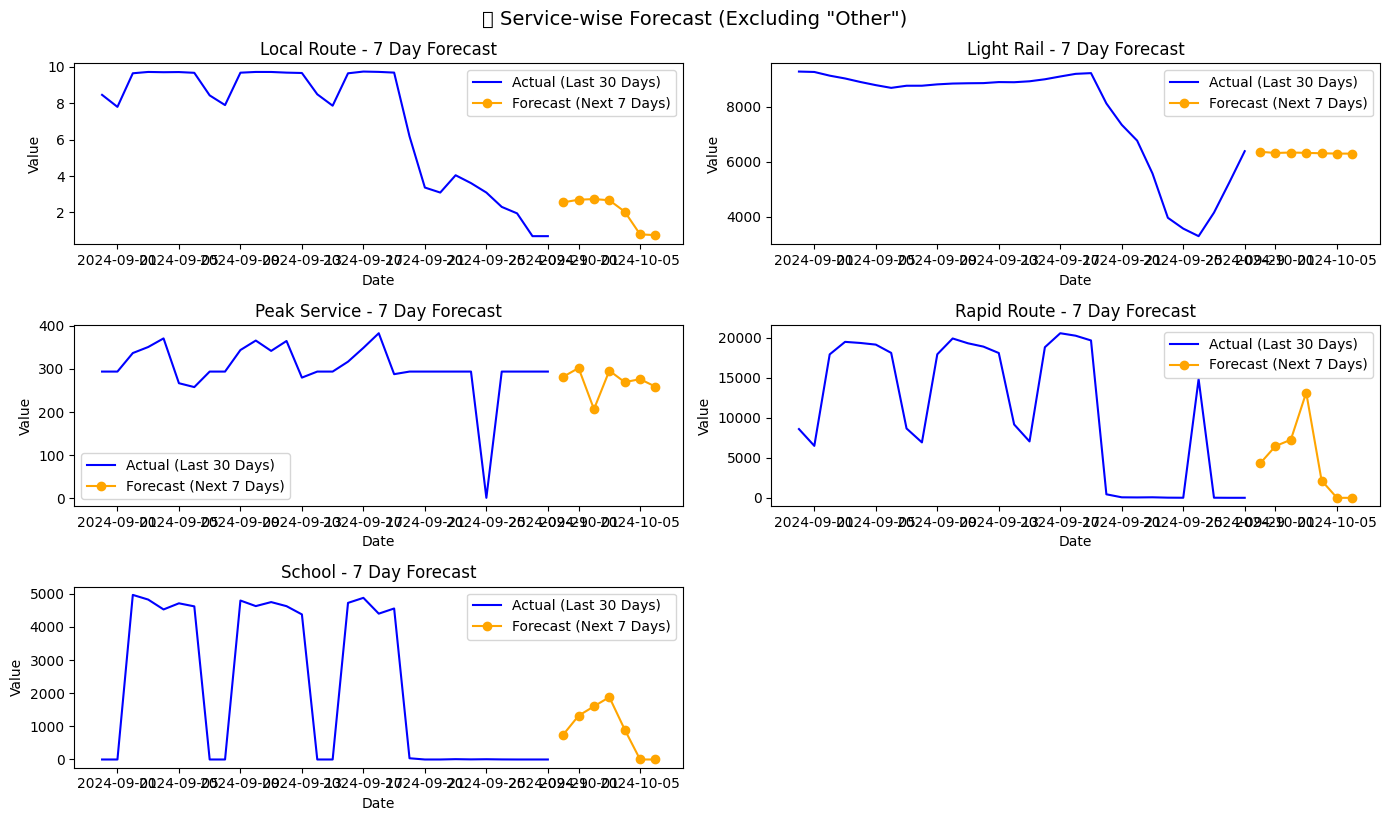

In [96]:
# ======================
plt.figure(figsize=(14, 8))
for i, col in enumerate(service_columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(df.index[-30:], df[col].tail(30), label='Actual (Last 30 Days)', color='blue')
    plt.plot(final_forecast.index, final_forecast[col], label='Forecast (Next 7 Days)', color='orange', marker='o')
    plt.title(f'{col} - 7 Day Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()

plt.suptitle('📈 Service-wise Forecast (Excluding "Other")', fontsize=14, y=1.02)
plt.show()

The forecast shows stable or slightly fluctuating trends for most services in the coming week.
Local Route and Light Rail remain steady, indicating consistent demand.
Peak Service and Rapid Route show mild variations, suggesting short-term changes.
School Service maintains a cyclic pattern aligned with school schedules.
Overall, the model predicts no major spikes or drops, showing reliable short-term stability.

In [91]:
df["Other"] = df["Other"].fillna(method='ffill').clip(lower=0)
mean_value = df["Other"].mean()
forecast_other = [mean_value] * 7  # next 7 days same as mean


/tmp/ipython-input-1469990956.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Other"] = df["Other"].fillna(method='ffill').clip(lower=0)


In [93]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Ensure 'Date' is your index
df.index = pd.to_datetime(df.index)

# Fill missing values and remove negatives
series = df['Other'].fillna(method='ffill').clip(lower=0)

# Fit ARIMA model (no seasonality)
model = ARIMA(series, order=(2,1,2))
fit = model.fit()

# Forecast next 7 days
forecast = fit.forecast(steps=7)
print("Next 7-day forecast for 'Other':")
print(forecast)


/tmp/ipython-input-361861238.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df['Other'].fillna(method='ffill').clip(lower=0)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Next 7-day forecast for 'Other':
2024-09-30    59.595989
2024-10-01    60.837389
2024-10-02    61.062543
2024-10-03    61.109494
2024-10-04    61.114711
2024-10-05    61.118266
2024-10-06    61.117057
Freq: D, Name: predicted_mean, dtype: float64


/tmp/ipython-input-2136406819.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df['Other'].fillna(method='ffill').clip(lower=0)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


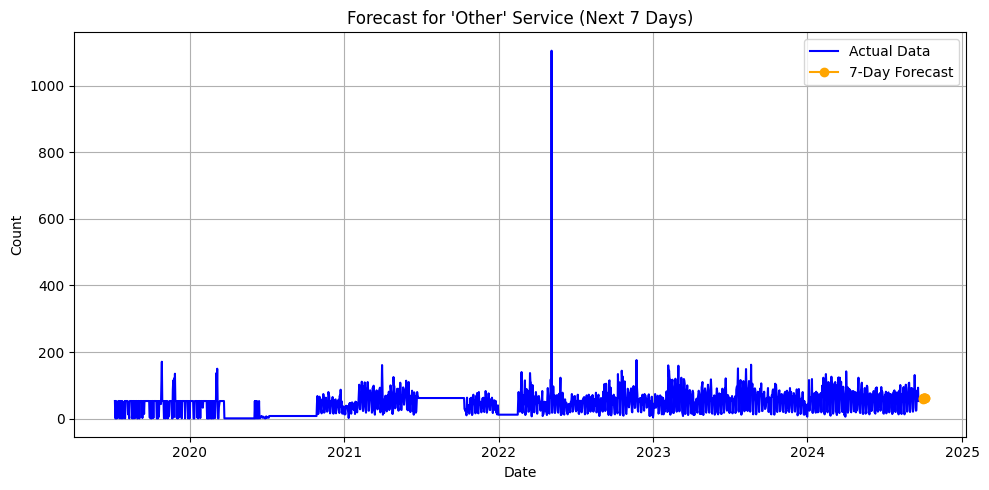

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure 'Date' is the index
df.index = pd.to_datetime(df.index)

# Prepare data
series = df['Other'].fillna(method='ffill').clip(lower=0)

# Fit ARIMA model
model = ARIMA(series, order=(2,1,2))
fit = model.fit()

# Forecast next 7 days
forecast = fit.forecast(steps=7)
forecast.index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

# Combine actual + forecast
combined = pd.concat([series, forecast])

# Visualization
plt.figure(figsize=(10,5))
plt.plot(series, label='Actual Data', color='blue')
plt.plot(forecast, label='7-Day Forecast', color='orange', marker='o')
plt.title("Forecast for 'Other' Service (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Blue line → your actual past data.

Orange line → model’s forecast for the next 7 days